# Cognifyz Data Science Internship - Level 3 Tasks
# Intern Name: Bushra Shaikh
# Tasks: Customer Preference Analysis | Data Visualization | Predictive Modeling


In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [4]:
# Load the dataset
df = pd.read_csv("Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


![task discription](1.png)

In [5]:
# Task 1: Customer Preference Analysis

C:\Users\Bushra\AppData\Local\Temp\ipykernel_12276\514947586.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_group['Votes'], y=cuisine_group.index, palette='viridis')


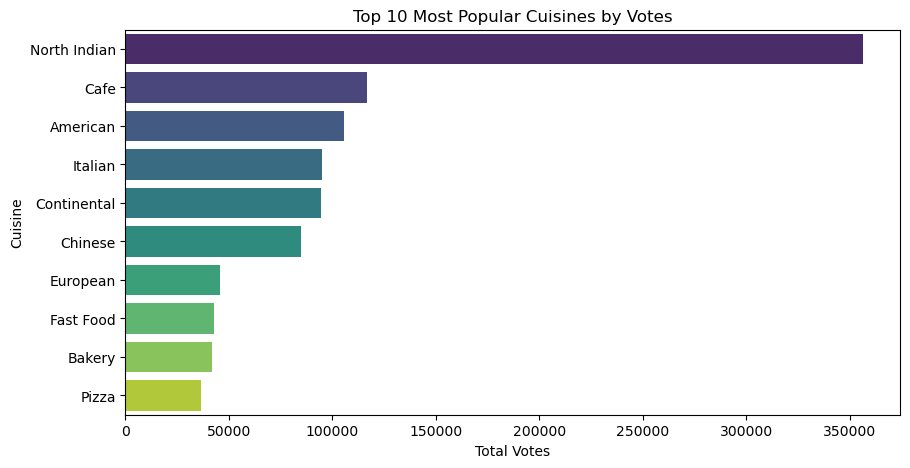

In [6]:
# Clean and simplify cuisine values
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df['Main Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0])

# Group by cuisine
cuisine_group = df.groupby('Main Cuisine').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).sort_values(by='Votes', ascending=False).head(10)

# Plot most popular cuisines
plt.figure(figsize=(10,5))
sns.barplot(x=cuisine_group['Votes'], y=cuisine_group.index, palette='viridis')
plt.title('Top 10 Most Popular Cuisines by Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()


In [7]:
# Task 2: Data Visualization

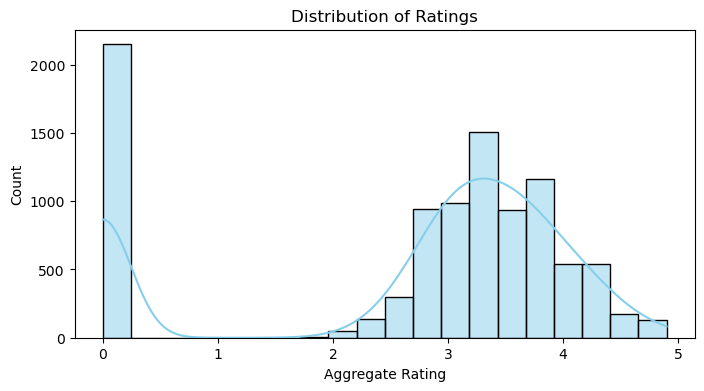

In [8]:
# Distribution of Ratings
plt.figure(figsize=(8,4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()


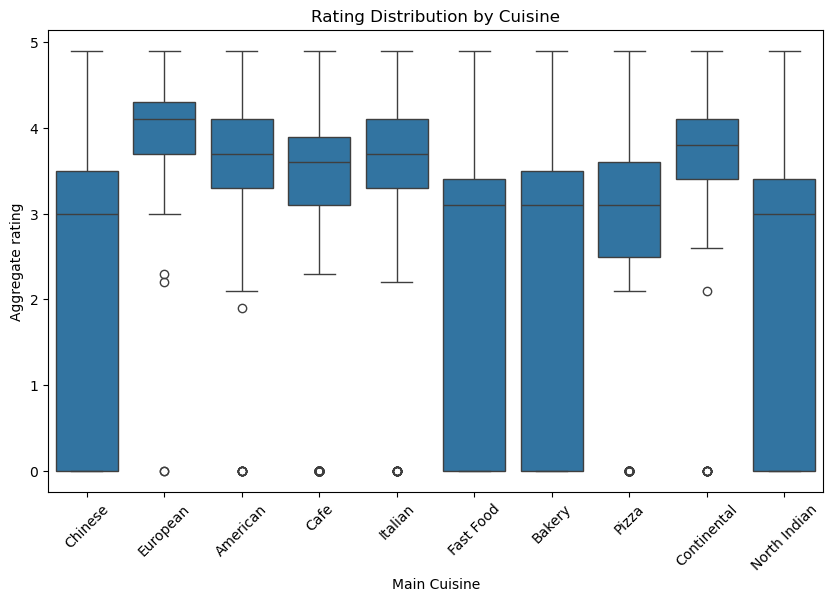

In [9]:
## Boxplot of ratings by top cuisines
top_cuisines = cuisine_group.index.tolist()
df_top = df[df['Main Cuisine'].isin(top_cuisines)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_top, x='Main Cuisine', y='Aggregate rating')
plt.xticks(rotation=45)
plt.title('Rating Distribution by Cuisine')
plt.show()


C:\Users\Bushra\AppData\Local\Temp\ipykernel_12276\2208898131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.values, y=city_avg.index, palette='mako')


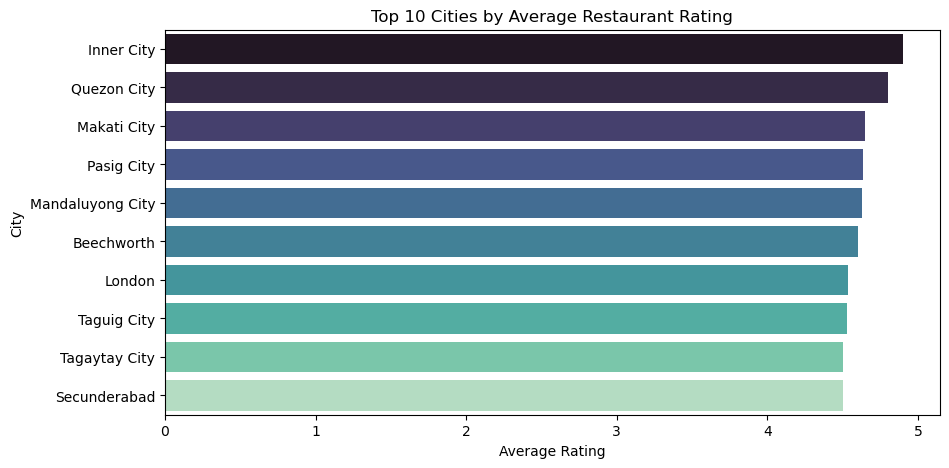

In [10]:
# Average rating by city
city_avg = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=city_avg.values, y=city_avg.index, palette='mako')
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


# Conclusion:

Cities like Inner City, Quezon City, and Makati City are high-performing in terms of restaurant ratings.

These insights can help businesses prioritize locations for food ventures.

In [11]:
#Task 3: Predictive Modeling

In [12]:
# Encode categorical features
df['Has Online delivery'] = df['Has Online delivery'].str.lower().map({'yes': 1, 'no': 0})
df['Has Table booking'] = df['Has Table booking'].str.lower().map({'yes': 1, 'no': 0})

# Select features
features = ['Price range', 'Votes', 'Has Online delivery', 'Has Table booking']
target = 'Aggregate rating'

X = df[features]
y = df[target]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression R2: 0.2633012163679983


In [14]:
# Decision Tree
tr = DecisionTreeRegressor(random_state=42)
tr.fit(X_train, y_train)
y_pred_tr = tr.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, y_pred_tr))


Decision Tree R2: 0.9144306314014661


In [15]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest R2: 0.9313388429439261


In [ ]:
#The Random Forest Regressor had the highest predictive performance, capturing 93% of the variance in Aggregate rating.

Decision Tree was also strong, while Linear Regression underperformed due to nonlinear relationships and feature variance.

